In [1]:
import pandas as pd

In [2]:
fish=pd.read_csv("resources/resources/Fish.csv") #veri okuma
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
fish.shape #datafram in satır sütun sayısını ogrenme

(159, 7)

In [4]:
fish.info() #dataframe hakkında genel bilgi alma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish.describe().T #dataframe deki columnların aritmetik verilerinin transpozunu alma

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
fish.columns #dataframe in columnlarını getirme

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
#grafik çizmek için
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1400x800 with 0 Axes>

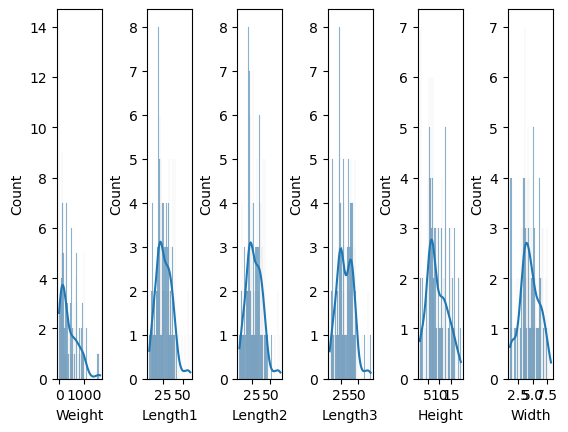

In [8]:
plt.figure(figsize=(14,8))
fig,ax=plt.subplots(1,6)
plt.subplots_adjust(hspace=1,wspace=1)
y=0
for col in fish.columns[1:]:
    sns.histplot(fish[col],bins=100,kde=True,ax=ax[y])
    y+=1

<AxesSubplot:xlabel='count', ylabel='Species'>

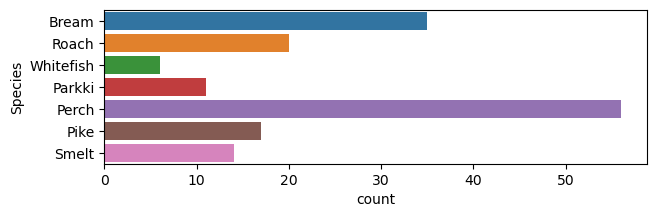

In [9]:
plt.figure(figsize=(7,2))
sns.countplot(y="Species",data=fish)

<Figure size 2000x1000 with 0 Axes>

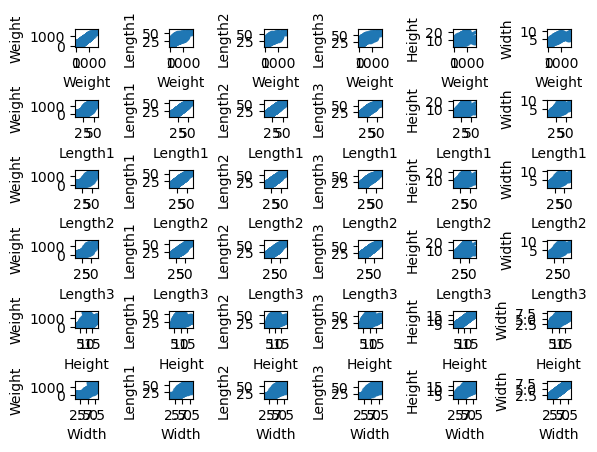

In [10]:
plt.figure(figsize=(20,10))
fig,ax=plt.subplots(6,6)
plt.subplots_adjust(hspace=3,wspace=3)
x=0
for first in fish.columns[1:]:
    y=0
    for col in fish.columns[1:]:
        sns.regplot(x=first,y=col,data=fish,ax=ax[x,y])
        y+=1
    x+=1

<AxesSubplot:>

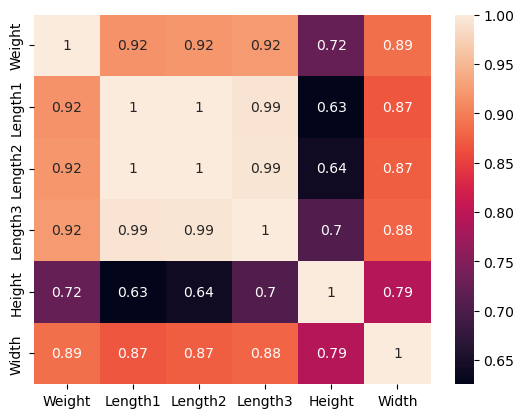

In [11]:
#korelasyon sıcaklık haritası
sns.heatmap(fish.corr(),annot=True)

<AxesSubplot:xlabel='Weight', ylabel='Width'>

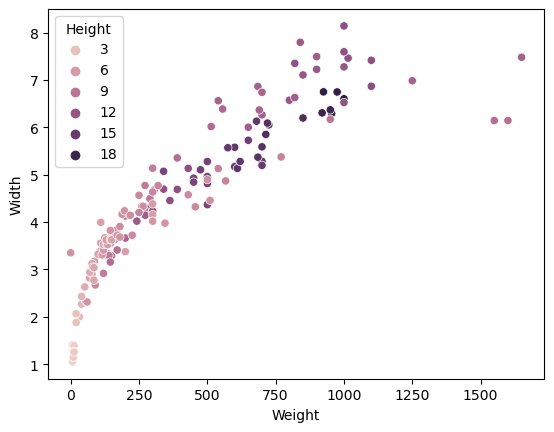

In [12]:
#iki columna göre graik çizmek
sns.scatterplot(x="Weight",y="Width",data=fish,hue="Height")

In [13]:
a=fish["Weight"]
fish.drop("Weight",inplace=True,axis=1)
fish=fish.join(a)
fish

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936,12.2
155,Smelt,11.7,12.4,13.5,2.4300,1.2690,13.4
156,Smelt,12.1,13.0,13.8,2.2770,1.2558,12.2
157,Smelt,13.2,14.3,15.2,2.8728,2.0672,19.7


In [14]:
X=fish[fish.columns[3:]]

In [15]:
X

,Length1,Length2,Length3,Height,Width,Weight
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,12.2
155,11.7,12.4,13.5,2.4300,1.2690,13.4
156,12.1,13.0,13.8,2.2770,1.2558,12.2
157,13.2,14.3,15.2,2.8728,2.0672,19.7


In [24]:
from sklearn.cluster import KMeans #kümeleme yapacağımız için import ediyoruz
import numpy as np

In [25]:
uzaklik=[]
for n in range(1,11):
    model=KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42)
    model.fit(X)
    uzaklik.append(model.inertia_)

C:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\msika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

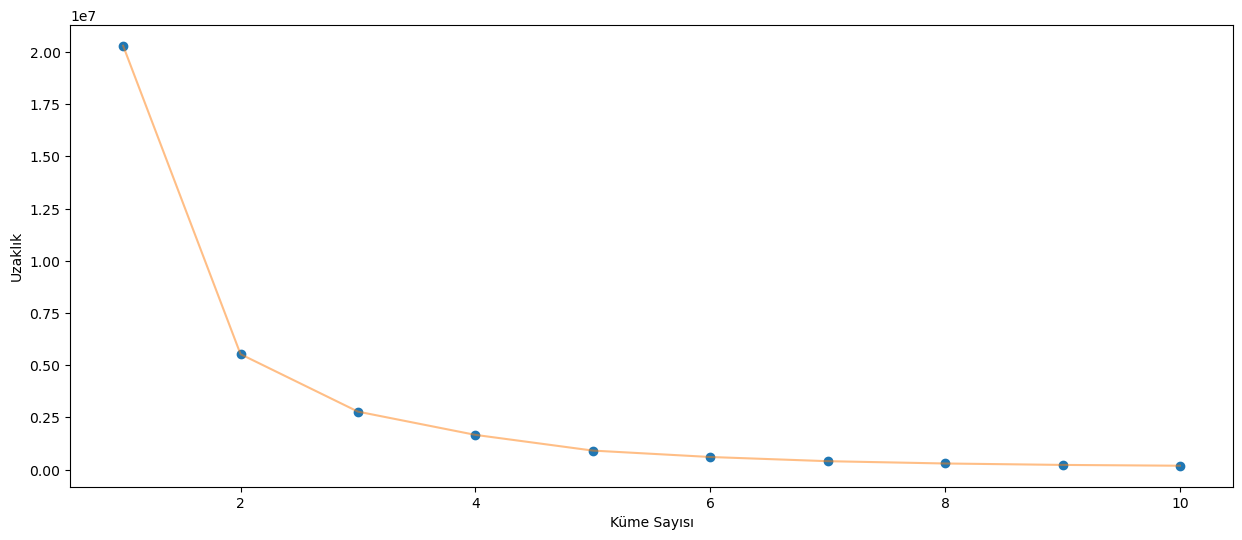

In [27]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),uzaklik,'o')
plt.plot(np.arange(1,11),uzaklik,'-',alpha=0.5)
plt.xlabel("Küme Sayısı"),plt.ylabel("Uzaklık")
plt.show()

In [32]:
model=(KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=42,algorithm='elkan'))
model.fit(X)
newLabel=model.labels_
merkezler=model.cluster_centers_

In [33]:
newLabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [34]:
merkezler

array([[ 21.38715596,  23.18440367,  25.49541284,   7.01758257,
          3.52415229, 192.08165138],
       [ 36.842     ,  39.82      ,  43.722     ,  13.22943   ,
          6.364952  , 847.94      ]])